In [23]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
%matplotlib inline

In [2]:
DATA_PATH = Path().parent.absolute() / "source" / "training-2012.csv"

In [3]:
df = pd.read_csv(DATA_PATH)
df

In [7]:
df.dtypes

slug             object
page            float64
x0              float64
y0              float64
x1              float64
y1              float64
token            object
gross_amount    float64
dtype: object

In [10]:
# Use Pandas 1.x style strings.
string_cols = ["slug", "token"]
df[string_cols] = df[string_cols].astype("string")

# Downcast floats to 32-bits (more than enough, and saves memory).
float_cols = ["page", "x0", "y0", "x1", "y1", "gross_amount"]
for col in float_cols:
    df[col] = pd.to_numeric(df[col], downcast='float')

In [12]:
df.dtypes

slug             string
page            float32
x0              float32
y0              float32
x1              float32
y1              float32
token            string
gross_amount    float32
dtype: object

In [11]:
slugs = df["slug"].unique()
len(slugs), slugs[0]

(16537, '463095-obama-6269464-rv-1-13499880177675-_-pdf')

In [16]:
tokens_per_slug = df.groupby("slug")["gross_amount"].count()
tokens_per_slug

slug
414543-wcpo-tv-collect-files-59438-political-file-2012     4045
414565-wcpo-tv-collect-files-59438-political-file-2012    13594
414581-wcpo-tv-collect-files-59438-political-file-2012      461
414585-wcpo-tv-collect-files-59438-political-file-2012      562
414586-wcpo-tv-collect-files-59438-political-file-2012     1141
                                                          ...  
536257-wwj-geoffrey-fieger-attorney-x-issue-ord54793        286
536259-wwj-geoffrey-fieger-attorney-x-issue-ord54793        207
536260-wwj-geoffrey-fieger-attorney-x-issue-ord54911        286
536390-wwj-geoffrey-fieger-attorney-x-issue-ord54911        206
537371-crossroads-1353-733332-1-13551828069338-_-pdf        358
Name: gross_amount, Length: 16537, dtype: int64

(array([11391., 14122., 14741., 14937., 15089., 15220., 15347., 15478.,
        15573., 15675., 15776., 15874., 15947., 16009., 16053., 16105.,
        16144., 16183., 16227., 16256., 16284., 16308., 16331., 16349.,
        16360., 16372., 16388., 16403., 16414., 16426., 16433., 16446.,
        16453., 16462., 16469., 16474., 16481., 16485., 16488., 16495.,
        16499., 16502., 16505., 16509., 16512., 16518., 16520., 16522.,
        16524., 16526., 16527., 16528., 16528., 16528., 16528., 16529.,
        16529., 16529., 16529., 16529., 16529., 16530., 16531., 16531.,
        16531., 16532., 16532., 16533., 16533., 16533., 16533., 16533.,
        16533., 16533., 16533., 16534., 16534., 16534., 16534., 16535.,
        16535., 16535., 16535., 16535., 16535., 16535., 16535., 16535.,
        16535., 16535., 16536., 16536., 16536., 16536., 16536., 16536.,
        16536., 16536., 16536., 16537.]),
 array([4.2000000e+01, 1.8561600e+03, 3.6703200e+03, 5.4844800e+03,
        7.2986400e+03, 9.1

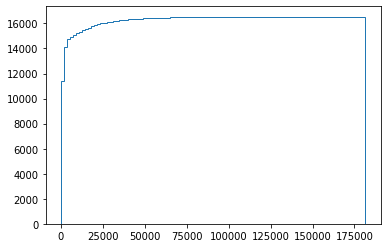

In [22]:
plt.hist(tokens_per_slug, 100, histtype="step", cumulative=True)

It's a _little_ weird that some documents have >150k tokens, right?

In [24]:
tokens_per_slug.quantile(np.linspace(0, 1, 21))

0.00        42.0
0.05       305.0
0.10       428.0
0.15       527.0
0.20       633.0
0.25       727.0
0.30       823.8
0.35       929.6
0.40      1030.0
0.45      1145.2
0.50      1270.0
0.55      1398.0
0.60      1530.0
0.65      1682.0
0.70      1923.0
0.75      2201.0
0.80      2712.8
0.85      3558.6
0.90      6780.0
0.95     18692.8
1.00    181458.0
Name: gross_amount, dtype: float64

In [27]:
large_docs = tokens_per_slug[tokens_per_slug > 100000]
large_docs

slug
427339-collect-files-35870-political-file-2012-non         181458
438948-collect-files-73292-political-file-2012-federal     118480
442220-collect-files-53113-political-file-2012-federal     114282
447084-collect-files-23074-political-file-2012-federal     100060
455688-oct16-nov6-482664rev2-13494567090541-_-pdf          144288
455996-dalton-wsoc-330956-09-11-12-13480890822926-_-pdf    111260
468456-oct30-nov5-485108-13501525249934-_-pdf              121814
483237-mandel_rep_senate_1009_110612_304458                136908
511342-ac-est-692-final_322535-1-13524177893590-_-pdf      164472
Name: gross_amount, dtype: int64

In [28]:
longest_doc = df[df["slug"] == "427339-collect-files-35870-political-file-2012-non"]

In [30]:
longest_doc.groupby("token")["gross_amount"].count().sort_values()

token
‘R       18
GEE      18
GEK      18
GI       18
GM       18
       ... 
A      6102
S      6210
T      6642
0      7866
E      7992
Name: gross_amount, Length: 1477, dtype: int64

It looks like mostly we have a bunch of additional bounding boxes for individual characters.

In [42]:
filtered = longest_doc[longest_doc["token"].str.len() >= 3]
len(filtered)

31860

In [43]:
filtered.groupby("token").count()["gross_amount"].sort_values()

token
!!!#XA       18
LOOA-10      18
LSI          18
Lat          18
LateGame     18
           ... 
09/18/12    522
Weekdays    558
KVVU        594
Rate        612
Date        666
Name: gross_amount, Length: 947, dtype: int64

Dang though, we still have 666 instances of the word 'Date'. How many pages is this document anyway?

In [44]:
len(longest_doc.groupby("page"))

17